In [1]:
import sys, os
import numpy as np
import scipy.linalg as sc
from scipy.sparse.linalg import eigsh
from scipy import sparse as spa
import seaborn as sns
import qiskit
import qiskit.quantum_info as q
from qiskit import QuantumCircuit as qc
from qiskit.quantum_info import SparseObservable as obs
from qiskit.quantum_info import SparsePauliOp as sp
from qiskit.quantum_info import Operator as op
ops = obs.BitTerm
assert ops.X is obs.BitTerm.X
assert ops.Z is obs.BitTerm.Z

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import networkx as nx
np.set_printoptions(suppress=True,precision=3)

In [2]:
H_SPT9 = np.load('H_SPT9.npy',allow_pickle=True)
H_SPT9t = np.load('H_SPT9t.npy',allow_pickle=True)
triv_9 = np.load('triv_9.npy',allow_pickle=True)
is_9nn = np.load('Ising_9nn.npy',allow_pickle=True)
H_SPT12 = np.load('H_SPT12.npy',allow_pickle=True)
H_SPT122 = np.load('H_SPT122.npy',allow_pickle=True)
H_SPT12t = np.load('H_SPT12t.npy',allow_pickle=True)
H_SPT12tf = np.load('H_SPT12tf.npy',allow_pickle=True)
H_SPT12f = np.load('H_SPT12f.npy',allow_pickle=True)
H_SPT12f1 = np.load('H_SPT12f1.npy',allow_pickle=True)
H_SPT9f = np.load('H_SPT9f.npy',allow_pickle=True)
triv_12 = np.load('triv_12.npy',allow_pickle=True)
is_12nn = np.load('Ising_12nn.npy',allow_pickle=True)
H_SPT16 = np.load('H_SPT16.npy',allow_pickle=True)
H_SPT16t = np.load('H_SPT16t.npy',allow_pickle=True)
triv_16 = np.load('triv_16.npy',allow_pickle=True)
triv_18 = np.load('triv_18.npy',allow_pickle=True)
triv_21 = np.load('triv_21.npy',allow_pickle=True)
is_16nn = np.load('Ising_16nn.npy',allow_pickle=True)
is_9t = np.load('Ising_9t.npy',allow_pickle=True)
is_12t = np.load('Ising_12t.npy',allow_pickle=True)
is_16t = np.load('Ising_16t.npy',allow_pickle=True)
is_18t = np.load('Ising_18t.npy',allow_pickle=True)
is_12tf = np.load('Ising_12tf.npy',allow_pickle=True)
is_15tf = np.load('Ising_15tf.npy',allow_pickle=True)
is_18tf = np.load('Ising_18tf.npy',allow_pickle=True)
is_9 = np.load('Ising_9.npy',allow_pickle=True)
is_12 = np.load('Ising_12.npy',allow_pickle=True)
is_122 = np.load('Ising_122.npy',allow_pickle=True)
is_12f = np.load('Ising_12f.npy',allow_pickle=True)
is_15f = np.load('Ising_15f.npy',allow_pickle=True)
is_18f = np.load('Ising_18f.npy',allow_pickle=True)
is_16 = np.load('Ising_16.npy',allow_pickle=True)
is_18 = np.load('Ising_18.npy',allow_pickle=True)
is_21 = np.load('Ising_21.npy',allow_pickle=True)
H_SPT15= np.load('H_SPT15.npy',allow_pickle=True)
H_SPT15f= np.load('H_SPT15f.npy',allow_pickle=True)
H_SPT15t= np.load('H_SPT15t.npy',allow_pickle=True)
H_SPT15tf= np.load('H_SPT15tf.npy',allow_pickle=True)
H_SPT18= np.load('H_SPT18.npy',allow_pickle=True)
H_SPT18t= np.load('H_SPT18t.npy',allow_pickle=True)
H_SPT18tf= np.load('H_SPT18tf.npy',allow_pickle=True)
H_SPT18f= np.load('H_SPT18f.npy',allow_pickle=True)
is_15 = np.load('Ising_15.npy',allow_pickle=True)
is_15t = np.load('Ising_15t.npy',allow_pickle=True)
triv_15 = np.load('triv_15.npy',allow_pickle=True)
H_pivot9= np.load('H_pivot9.npy',allow_pickle=True)
H_pivot12= np.load('H_pivot12.npy',allow_pickle=True)
H_pivot15= np.load('H_pivot15.npy',allow_pickle=True)

In [3]:
triv_16 = np.load('triv_16.npy',allow_pickle=True)
triv_20 = np.load('triv_20.npy',allow_pickle=True)
is_16 = np.load('Ising_16.npy',allow_pickle=True)
is_16f = np.load('Ising_16f.npy',allow_pickle=True)
is_16t = np.load('Ising_16t.npy',allow_pickle=True)
is_16tf = np.load('Ising_16tf.npy',allow_pickle=True)
is_20 = np.load('Ising_20.npy',allow_pickle=True)
is_20f = np.load('Ising_20f.npy',allow_pickle=True)
is_20t = np.load('Ising_20t.npy',allow_pickle=True)
is_20tf = np.load('Ising_20tf.npy',allow_pickle=True)
H_SPT20= np.load('H_SPT20.npy',allow_pickle=True)
H_SPT20f= np.load('H_SPT20f.npy',allow_pickle=True)
H_SPT20t= np.load('H_SPT20t.npy',allow_pickle=True)
H_SPT20tf= np.load('H_SPT20tf.npy',allow_pickle=True)
H_SPT16= np.load('H_SPT16.npy',allow_pickle=True)
H_SPT16f= np.load('H_SPT16f.npy',allow_pickle=True)
H_SPT16t= np.load('H_SPT16t.npy',allow_pickle=True)
H_SPT16tf= np.load('H_SPT16tf.npy',allow_pickle=True)


In [5]:
def Ham(alpha,J,N):
    if (N==9):
        return((1-alpha)*triv_9 + alpha*H_SPT9 + J*is_9)
    if (N==12):
        return((1-alpha)*triv_12 + alpha*H_SPT12 + J*is_12)
    if (N==16):
        return((1-alpha)*triv_16 + alpha*H_SPT16 + J*is_16)
    if (N==15):
        return((1-alpha)*triv_15 + alpha*H_SPT15 + J*is_15)
    if (N==18):
        return((1-alpha)*triv_18 + alpha*H_SPT18 + J*is_18)
    if (N==13):
        return((1-alpha)*triv_12 + alpha*H_SPT122 + J*is_122)
    if (N==20):
        return((1-alpha)*triv_20 + alpha*H_SPT20 + J*is_20)
    
        
def Hamt(alpha,J,N):
    if (N==9):
        return((1-alpha)*triv_9 + alpha*H_SPT9t + J*is_9t)
    if (N==12):
        return((1-alpha)*triv_12 + alpha*H_SPT12t + J*is_12t)
    if (N==15):
        return((1-alpha)*triv_15 + alpha*H_SPT15t + J*is_15t)
    if (N==18):
        return((1-alpha)*triv_18 + alpha*H_SPT18t + J*is_18t)
    if (N==16):
        return((1-alpha)*triv_16 + alpha*H_SPT16t + J*is_16t)
    if (N==20):
        return((1-alpha)*triv_20 + alpha*H_SPT20t + J*is_20t)


def Hamtf(alpha,J,N):
    if (N==12):
        return((1-alpha)*triv_12 + alpha*H_SPT12tf + J*is_12tf)
    if (N==15):
        return((1-alpha)*triv_15 + alpha*H_SPT15tf + J*is_15tf)
    if (N==18):
        return((1-alpha)*triv_18 + alpha*H_SPT18tf + J*is_18tf)
    if (N==16):
        return((1-alpha)*triv_16 + alpha*H_SPT16tf + J*is_16tf)
    if (N==20):
        return((1-alpha)*triv_20 + alpha*H_SPT20tf + J*is_20tf)


def Hamf(alpha,J,N):
    if (N==9):
        return((1-alpha)*triv_9 + alpha*H_SPT9f + J*is_9f)
    if (N==12):
        return((1-alpha)*triv_12 + alpha*H_SPT12f + J*is_12f)
    if (N==15):
        return((1-alpha)*triv_15 + alpha*H_SPT15f + J*is_15f)
    if (N==18):
        return((1-alpha)*triv_18 + alpha*H_SPT18f + J*is_18f)
    if (N==16):
        return((1-alpha)*triv_16 + alpha*H_SPT16f + J*is_16f)
    if (N==20):
        return((1-alpha)*triv_20 + alpha*H_SPT20f + J*is_20f)


def Hamf1(alpha,J,N):
    if (N==12):
        return((1-alpha)*triv_12 + alpha*H_SPT12f1 + J*is_12f)

def mag(N):
    p = ['I'] * N
    p[0] = 'Z'
    p = ''.join(p)
    mag = sp([p],coeffs=[1])
    for i in range(1,N):
        p = ['I'] * N
        p[i] = 'Z'
        p = ''.join(p)
        mag = mag + sp([p],coeffs=[1])
    return(mag.to_matrix(sparse=True)/N)

m2_9 = mag(9)**2
m4_9 = m2_9**2
m2_12 = mag(12)**2
m4_12 = m2_12**2
m2_16 = mag(16)**2
m4_16 = m2_16**2
m2_15 = mag(15)**2
m4_15 = m2_15**2
m2_18 = mag(18)**2
m4_18 = m2_18**2

def binder(eval,ev,N):
    #rtol = 0.001 #Eigenvalues within 0.01% of the lowest will be counted as ground states
    #min_ev = np.min(eval)
    #if (eval[1]-eval[0]<1/N**2):
        #gs_index = np.array([0,1])
    #lse:
    gs_index = np.array([0])
    #gs_index = np.where(np.isclose(eval, min_ev, rtol=rtol))[0]
    gs = ev[:,gs_index]
    if (N==9):
        return(np.abs(np.size(gs_index)*np.trace(gs.T.conj()@m4_9.dot(gs))/np.trace(gs.T.conj()@m2_9.dot(gs))**2))
    if ((N==12) or (N==13)):
        return(np.abs(np.size(gs_index)*np.trace(gs.T.conj()@m4_12.dot(gs))/np.trace(gs.T.conj()@m2_12.dot(gs))**2))       
    if (N==16):
        return(np.abs(np.size(gs_index)*np.trace(gs.T.conj()@m4_16.dot(gs))/np.trace(gs.T.conj()@m2_16.dot(gs))**2))        
    if (N==15):
        return(np.abs(np.size(gs_index)*np.trace(gs.T.conj()@m4_15.dot(gs))/np.trace(gs.T.conj()@m2_15.dot(gs))**2))        
    if (N==18):
        return(np.abs(np.size(gs_index)*np.trace(gs.T.conj()@m4_18.dot(gs))/np.trace(gs.T.conj()@m2_18.dot(gs))**2))        

In [15]:
N = 16
sym = sp(['X'*N], coeffs=[1])
test = Ham(0.5,-0.013,16)
eval1, ev1 = eigsh(test,k=2,which='SA')
print(eval1)
print(ev1[:,0].T.conj()@sym.to_matrix(sparse=True)@ev1[:,0])
print(ev1[:,1].T.conj()@sym.to_matrix(sparse=True)@ev1[:,1])#+ev1[:,1].T.conj()@sym.to_matrix(sparse=True)@ev1[:,1])

[-12.405 -12.106]
(0.9999999999999978+1.8041124150158794e-16j)
(-0.9999999999999967+3.122502256758253e-17j)


In [7]:
def binder2(alpha,J,N):
    H = Hamt(alpha,J,N)
    eval, ev = eigsh(H,k=2,which='SA')
    idx = eval.argsort()
    eval = eval[idx]
    ev = ev[:,idx]
    #if (eval[1]-eval[0]<1/N):
        #b = np.abs(0.5*(ev[:,0].T.conj()@mag(N).dot(ev[:,0])+ev[:,1].T.conj()@mag(N).dot(ev[:,1])))
        #ch = np.abs(ev[:,0].T.conj().dot(H_pivot12*ev[:,0])+ ev[:,1].T.conj().dot(H_pivot12*ev[:,1]))
    #else:
    b=0
    #b = np.abs(ev[:,0].T.conj()@mag(N).dot(ev[:,0]))
        #ch = np.abs(ev[:,0].T.conj().dot(H_pivot12*ev[:,0]))
    #print(J,': ',eval[:3])
    return(binder(eval,ev,N))

In [183]:
n = 12
m = 1
b = np.zeros(shape=(m,n))
b1 = np.zeros(shape=(m,n))
b2 = np.zeros(shape=(m,n))
b3 = np.zeros(shape=(m,n))
b4 = np.zeros(shape=(m,n))
b5 = np.zeros(shape=(m,n))
J_c = np.empty(shape=m)
J = np.array([-0.1+0.01*i for i in range(n)])
alpha = np.array([0.49+0.25*i for i in range(m)])
#J = 0
for i in range(m):
    for j in range(n):
        #b[i,j] = binder2(alpha[i],J[j],9)
        #b1[i,j] = binder2(alpha[i],J[j],12)
        b2[i,j] = binder2(alpha[i],J[j],15)
        #b3[i,j] = binder2(alpha[i],J[j],16)
        b4[i,j] = binder2(alpha[i],J[j],12)
        b5[i,j] = binder2(alpha[i],J[j],18)
    cp1 = np.argwhere(np.diff(np.sign(b2[i,:] - b5[i,:]))).flatten()
    #cp2 = np.argwhere(np.diff(np.sign(b4[i,:] - b2[i,:]))).flatten()
    #cp3 = np.argwhere(np.diff(np.sign(b4[i,:] - b5[i,:]))).flatten()
    #arg = np.floor(1/3*(cp1+cp2+cp3)).astype(int)
    #arg1 = np.floor(0.5*(cp1+cp3)).astype(int)
    #J_c[i] = 0.5*(J[arg1]+J[arg1+1])

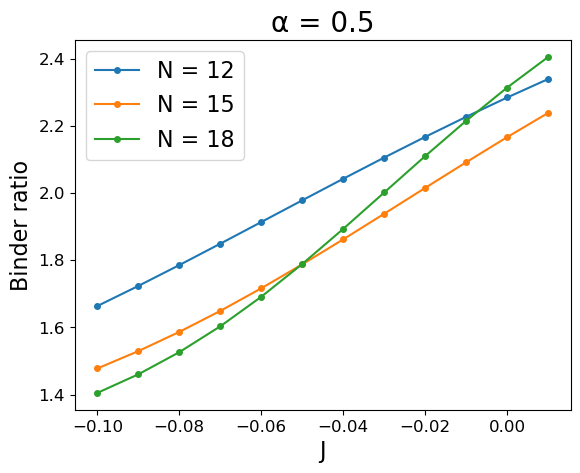

In [189]:

#plt.plot(J,b[:,0],label='N =9',marker='o',markersize=4)
#plt.plot(J,b10,:],label='12',marker='o',markersize=4)
plt.plot(J,b4[0,:],label='N = 12',marker='o',markersize=4)
plt.plot(J,b2[0,:],label='N = 15',marker='o',markersize=4)
#plt.plot(J,b3[:,0],label='N = 16',marker='o',markersize=4)
plt.plot(J,b5[0,:],label='N = 18',marker='o',markersize=4)
#plt.axvline(x=-0.09, color='red', linestyle='--')
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.xlabel('J',fontsize=16)
plt.ylabel('Binder ratio',fontsize=16)
plt.legend(fontsize=16)
plt.title('α = 0.5',fontsize=20)
plt.show()

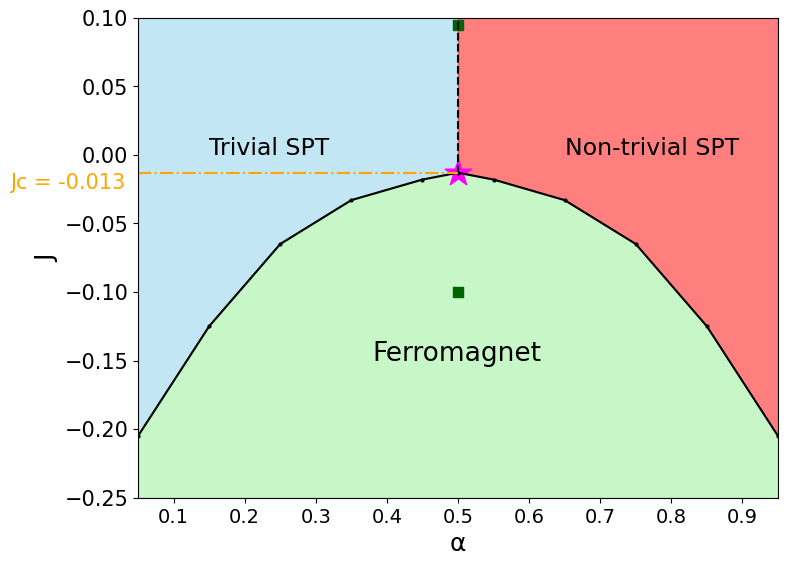

In [49]:
#print(J_c)
#print(alpha)
J_f13 = np.array([-0.235, -0.205, -0.165, -0.125,-0.10, -0.065, -0.045,-0.033,-0.023,-0.018,-0.013]) #WITH ALL THREE, MIDPOINT Jc
J_f = np.array([-0.205,  -0.125, -0.065, -0.033,-0.018,-0.013]) #WITH ALL THREE, MIDPOINT Jc
J_f12 = np.array([-0.235,  -0.165, -0.10,  -0.045,-0.023,-0.018,-0.013]) #WITH ALL THREE, MIDPOINT Jc
J_f0 = np.array([-0.24, -0.2,  -0.16,-0.12, -0.1,  -0.07, -0.06,-0.05, -0.04, -0.03, -0.02])
J_f0 = np.array([-0.24, -0.21,  -0.17,-0.13, -0.11,  -0.07, -0.05,-0.03, -0.03, -0.03, -0.03])
#J_f = np.array([-0.24, -0.21,  -0.17,-0.13, -0.07,  -0.05, -0.04,-0.04, -0.03, -0.02, -0.02])
alp13 = np.array([0,   0.05, 0.1,0.15, 0.2,  0.25, 0.3,0.35, 0.4,  0.45, 0.5 ])
alp12 = np.array([0, 0.1, 0.2, 0.3, 0.4,  0.45, 0.5 ])
alp = np.array([ 0.05,0.15,  0.25, 0.35,   0.45, 0.5 ])
J_f1 = J_f[::-1]
alp1 = np.ones(shape=np.shape(alp)[0]) - alp[::-1]
J_c = np.append(J_f,J_f1[1:])
alp2 = np.append(alp,alp1[1:])
#plt.axvline(x=0.5, color='black', linestyle='--')
plt.plot(alp2,J_c,color='black',marker='o',markersize=2)
plt.plot(np.array([0.5,0.5]),np.array([-0.013,0.1]),color='black',linestyle='--')
plt.plot(np.array([0.05,0.5]),np.array([-0.013,-0.013]),color='orange',linestyle='-.')
#plt.plot(np.array([0.1,0.9]),np.array([-0.013,-0.013]),color='darkgreen')
plt.fill_between(alp, J_f, 0.1, color='skyblue', alpha=0.5)
plt.fill_between(alp1, J_f1, 0.1, color='red', alpha=0.5)
plt.fill_between(alp2, J_c, -0.25, color='lightgreen', alpha=0.5)
plt.scatter([0.5], [-0.013],marker='*',s=400,color='magenta')
plt.scatter([0.5], [-0.1],marker='s',s=50,color='darkgreen')
plt.scatter([0.5], [0.095],marker='s',s=50,color='darkgreen')
plt.ylabel('J',size=18)
plt.xlabel('α',size=18)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 15
plt.text(0.38,-0.15,'Ferromagnet',size=19)
plt.text(0.15,0,'Trivial SPT',size=17)
plt.text(0.65,0,'Non-trivial SPT',size=17)
plt.text(-0.13,-0.025,'Jc = -0.013',size=15,color='orange')
plt.gca()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.savefig("myfig.png")
plt.show()

In [12]:
print('alpha = 0.5')
print('J = 0.1 > J_c')
print('Spectrum',eval_c[:5])
print('<symmetry>',ev_c[:,0].T@sym_9@ev_c[:,0])  #No GSD
#print('<symmetry>',0.5*(ev_c[:,0].T@sym_9@ev_c[:,0]+ev_c[:,1].T@sym_9@ev_c[:,1])) #GSD=2
print(' With flux :')
print('Spectrum', eval_cf[:5])
#print('<symmetry>',ev_cf[:,0].T@sym_9@ev_cf[:,0]) #No GSD
print('<symmetry>',0.5*(ev_cf[:,0].T@sym_9@ev_cf[:,0]+ev_cf[:,1].T@sym_9@ev_cf[:,1]))  #GSD=2

alpha = 0.5
J = 0.1 > J_c
Spectrum [-7.29  -6.88  -5.947 -5.881 -5.881]
<symmetry> (0.9999999999999996+0j)
 With flux :
Spectrum [-6.505 -6.505 -5.811 -5.811 -5.203]
<symmetry> (2.3418766925686896e-17+0j)


In [13]:
alpha=0.5
J=-0.1
e, ev = eigsh(Ham(alpha,J,16),k=2,which='SA')
F16= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,16),k=2,which='SA')
Ff16=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,16),k=2,which='SA')
Ft16=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,16),k=2,which='SA')
Ftf16=e[1]-e[0]


In [15]:
alpha=0.5
J=-0.013
e, ev = eigsh(Ham(alpha,J,16),k=2,which='SA')
C16= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,16),k=2,which='SA')
Cf16=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,16),k=2,which='SA')
Ct16=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,16),k=2,which='SA')
Ctf16=e[1]-e[0]

In [17]:
alpha=0.5
J=0.1
e, ev = eigsh(Ham(alpha,J,16),k=2,which='SA')
D16= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,16),k=2,which='SA')
Df16=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,16),k=2,which='SA')
Dt16=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,16),k=2,which='SA')
Dtf16=e[1]-e[0]

In [19]:
alpha=0.5
J=-0.1
e, ev = eigsh(Ham(alpha,J,20),k=2,which='SA')
F20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,20),k=2,which='SA')
Ff20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamt(alpha,J,20),k=2,which='SA')
Ft20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamtf(alpha,J,20),k=2,which='SA')
Ftf20= np.abs(e[1]-e[0])

In [21]:
alpha=0.5
J=-0.013
e, ev = eigsh(Ham(alpha,J,20),k=2,which='SA')
C20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,20),k=2,which='SA')
Cf20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamt(alpha,J,20),k=2,which='SA')
Ct20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamtf(alpha,J,20),k=2,which='SA')
Ctf20= np.abs(e[1]-e[0])

In [22]:
alpha=0.5
J=0.1
e, ev = eigsh(Ham(alpha,J,20),k=2,which='SA')
D20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,20),k=2,which='SA')
Df20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamt(alpha,J,20),k=2,which='SA')
Dt20= np.abs(e[1]-e[0])
e, ev = eigsh(Hamtf(alpha,J,20),k=2,which='SA')
Dtf20= np.abs(e[1]-e[0])

In [25]:
N = 12
alpha=0.5
J=-0.1
e, ev = eigsh(Ham(alpha,J,N),k=2,which='SA')
F12= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,N),k=2,which='SA')
Ff12=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,N),k=2,which='SA')
Ft12=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,N),k=2,which='SA')
Ftf12=e[1]-e[0]

In [27]:
alpha=0.5
J=-0.013
e, ev = eigsh(Ham(alpha,J,N),k=2,which='SA')
C12= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,N),k=2,which='SA')
Cf12=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,N),k=2,which='SA')
Ct12=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,N),k=2,which='SA')
Ctf12=e[1]-e[0]

In [29]:
alpha=0.5
J=0.1
e, ev = eigsh(Ham(alpha,J,N),k=2,which='SA')
D12= np.abs(e[1]-e[0])
e, ev = eigsh(Hamf(alpha,J,N),k=2,which='SA')
Df12=e[1]-e[0]
e, ev = eigsh(Hamt(alpha,J,N),k=2,which='SA')
Dt12=e[1]-e[0]
e, ev = eigsh(Hamtf(alpha,J,N),k=2,which='SA')
Dtf12=e[1]-e[0]

In [ ]:
print(F16,F18,F20)
print(C16,C18,C20)
print(D16,D18,D20)
print(Ff16,Ff18,Ff20)
print(Cf16,Cf18,Cf20)
print(Df16,Df18,Df20)
print(Ft16,Ft18,Ft20)
print(Ct16,Ct18,Ct20)
print(Dt16,Dt18,Dt20)

print(Ftf16,Ftf18,Ftf20)
print(Ctf16,Ctf18,Ctf20)
print(Dtf16,Dtf18,Dtf20)

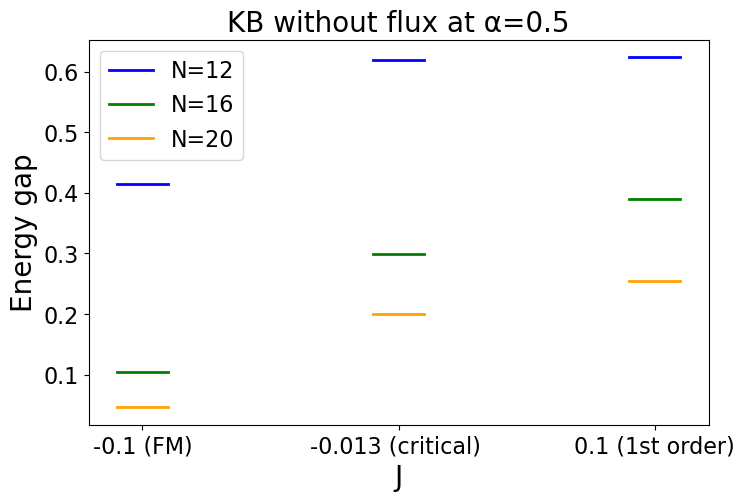

In [33]:
# Assign x-positions
x_vals = [1, 2, 3]
arrays = [[F12] , [C12],[D12]]
x_vals1 = [1, 2, 3]
arrays1 = [[F16] , [C16],[D16]]
x_vals2 = [1, 2, 3]
arrays2 = [[F20] , [C20],[D20]]
# Plot setup
plt.figure(figsize=(8, 5))
# Line segment width (in x-direction)
line_width = 0.2
# Plot horizontal line segments
i=0
j=0
k=0
for x, arr in zip(x_vals, arrays):
    for y in arr:
        if(i==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue',label='N=12')
            i = i+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
for x, arr in zip(x_vals1, arrays1):
    for y in arr:
        if(j==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green',label='N=16')
            j=j+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')            
for x, arr in zip(x_vals2, arrays2):
    for y in arr:
        if(k==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange',label='N=20')
            k=k+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
custom_tick_locations = [1, 2, 3]
custom_tick_labels = ['-0.1 (FM)', '-0.013 (critical) ', '0.1 (1st order)']
plt.xticks(custom_tick_locations, custom_tick_labels)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel('J',fontsize=20)
plt.ylabel('Energy gap',fontsize=20)
plt.title('KB without flux at α=0.5',fontsize=20)
plt.legend(fontsize=16)
plt.show()

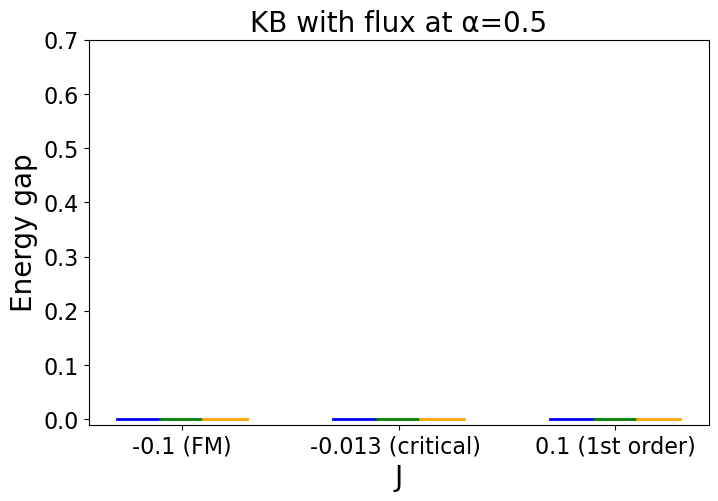

In [45]:
# Assign x-positions
x_vals = [0.8, 1.8, 2.8]
arrays = [[Ff12] , [Cf12],[Df12]]
x_vals1 = [1, 2, 3]
arrays1 = [[Ff16] , [Cf16],[Df16]]
x_vals2 = [1.2, 2.2, 3.2]
arrays2 = [[Ff20] , [Cf20],[Df20]]
# Plot setup
plt.figure(figsize=(8, 5))
# Line segment width (in x-direction)
line_width = 0.2
# Plot horizontal line segments
i=0
j=0
k=0
for x, arr in zip(x_vals, arrays):
    for y in arr:
        if(i==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
            i = i+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
for x, arr in zip(x_vals1, arrays1):
    for y in arr:
        if(j==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')
            j=j+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')            
for x, arr in zip(x_vals2, arrays2):
    for y in arr:
        if(k==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
            k=k+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
custom_tick_locations = [1, 2, 3]
custom_tick_labels = ['-0.1 (FM)', '-0.013 (critical) ', '0.1 (1st order)']
plt.xticks(custom_tick_locations, custom_tick_labels)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel('J',fontsize=20)
plt.ylabel('Energy gap',fontsize=20)
plt.ylim(-0.01, 0.7)
plt.title('KB with flux at α=0.5',fontsize=20)
plt.show()

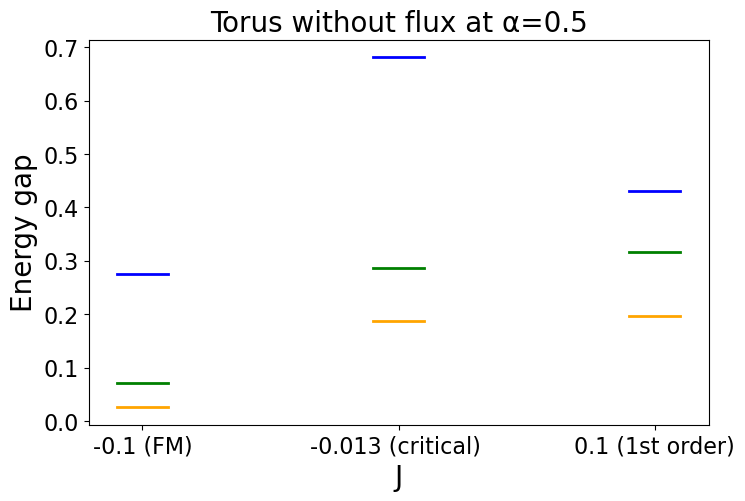

In [47]:
# Assign x-positions
x_vals = [1, 2, 3]
arrays = [[Ft12] , [Ct12],[Dt12]]
x_vals1 = [1, 2, 3]
arrays1 = [[Ft16] , [Ct16],[Dt16]]
x_vals2 = [1, 2, 3]
arrays2 = [[Ft20] , [Ct20],[Dt20]]
# Plot setup
plt.figure(figsize=(8, 5))
# Line segment width (in x-direction)
line_width = 0.2
# Plot horizontal line segments
i=0
j=0
k=0
for x, arr in zip(x_vals, arrays):
    for y in arr:
        if(i==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
            i = i+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
for x, arr in zip(x_vals1, arrays1):
    for y in arr:
        if(j==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')
            j=j+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')            
for x, arr in zip(x_vals2, arrays2):
    for y in arr:
        if(k==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
            k=k+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
custom_tick_locations = [1, 2, 3]
custom_tick_labels = ['-0.1 (FM)', '-0.013 (critical) ', '0.1 (1st order)']
plt.xticks(custom_tick_locations, custom_tick_labels)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel('J',fontsize=20)
plt.ylabel('Energy gap',fontsize=20)
plt.title('Torus without flux at α=0.5',fontsize=20)
plt.show()

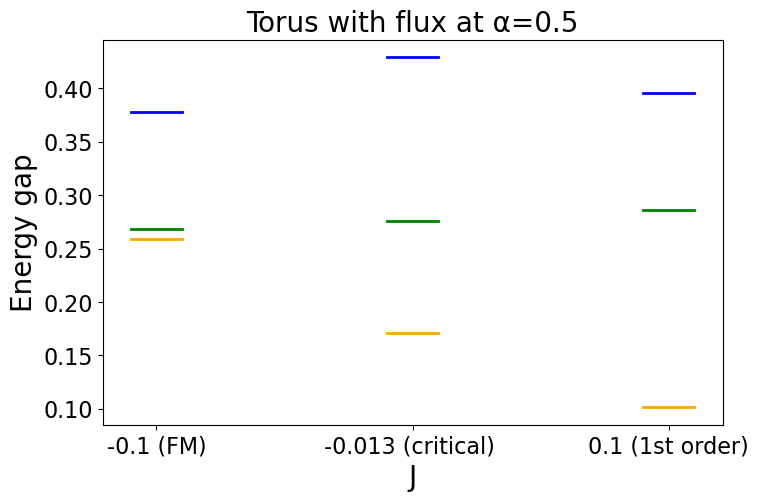

In [49]:
# Assign x-positions
x_vals = [1, 2, 3]
arrays = [[Ftf12] , [Ctf12],[Dtf12]]
x_vals1 = [1, 2, 3]
arrays1 = [[Ftf16] , [Ctf16],[Dtf16]]
x_vals2 = [1, 2, 3]
arrays2 = [[Ftf20] , [Ctf20],[Dtf20]]
# Plot setup
plt.figure(figsize=(8, 5))
# Line segment width (in x-direction)
line_width = 0.2
# Plot horizontal line segments
i=0
j=0
k=0
for x, arr in zip(x_vals, arrays):
    for y in arr:
        if(i==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
            i = i+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='blue')
for x, arr in zip(x_vals1, arrays1):
    for y in arr:
        if(j==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')
            j=j+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='green')            
for x, arr in zip(x_vals2, arrays2):
    for y in arr:
        if(k==0):
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
            k=k+1
        else:
            plt.plot([x - line_width / 2, x + line_width / 2], [y, y], lw=2,color='orange')
custom_tick_locations = [1, 2, 3]
custom_tick_labels = ['-0.1 (FM)', '-0.013 (critical) ', '0.1 (1st order)']
plt.xticks(custom_tick_locations, custom_tick_labels)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel('J',fontsize=20)
plt.ylabel('Energy gap',fontsize=20)
plt.title('Torus with flux at α=0.5',fontsize=20)
plt.show()